In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import powerlaw
import scipy.stats as stats
from scipy.optimize import curve_fit
import scipy.io as sio

from matplotlib import colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec
import  matplotlib.markers as mark

from matplotlib.legend_handler import HandlerPatch
import matplotlib.patches as mpatches

import os
from os.path import expanduser

In [2]:
# graphical properties
plt.rcParams["axes.edgecolor"] = "k"
plt.rcParams["axes.facecolor"] = "w"
plt.rcParams["axes.linewidth"] = "0.8"
plt.rcParams.update({'font.size': 7})
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['pdf.fonttype'] = 42 # prepare as vector graphic
plt.rcParams['ps.fonttype'] = 42

plt.rcParams["font.family"] = "Helvetica"

In [3]:
# paths
save_fig_path = '../figs/'

load_path =  '../paper_figures_data/fig5/'
abc_path = '../paper_figures_data/fig5/'

- functions

In [4]:
def comp_cdf(d1,d2,num_samples = 1000,eval_start = 1):
    '''
    Function for computing CDFs from distance distributions
    
    Parameters
    -----------
    d1, d2 : 1d array
        distance distributions from model 1 and 2
    num_samples : int
        number points to evaluate the CDFs.
    eval_start : int
       index of the first distance in d1 and d2 for evaluating CDFs.

    Returns
    -------
    cdf1, cdf2 : 1d array
        array of generated CDFs for two models.
    eval_points : 1d array
        array of points on which CDFs are computed (both models).
    bf : 1d array
        array of computed Bayes factors.
    '''
    d1_sorted = np.sort(d1)
    d2_sorted = np.sort(d2)
    eval_points = np.sort(np.unique(np.concatenate((d1_sorted[eval_start:],d2_sorted[eval_start:]))))
    cdf1 = []
    cdf2 = []
    for i in range(len(eval_points)):
        ind1 = np.where(d1_sorted<= eval_points[i])
        if np.size(ind1):
            cdf1.append((np.max(ind1)+1)/num_samples)
        else:
            cdf1.append(0)
        ind2 = np.where(d2_sorted<= eval_points[i])
        if np.size(ind2):
            cdf2.append((np.max(ind2)+1)/num_samples)
        else:
            cdf2.append(0)
    bf = np.array(cdf2)/np.array(cdf1)
    return cdf1, cdf2, eval_points, bf

# fig 5, model comparison

In [5]:
binSize = 1
num_samples = 1000
eval_start = 1

#-------------------------- single
# single OU -1
ac_examp_singOU =  np.load(load_path + 'ac_sing_tau20_T1000.npy')
data_map =  np.load(load_path + 'best_abcFit_linDist_singOU_fitupto50_lag65_step33.npy', allow_pickle=True)
ac_map_singOU_1 = data_map[0]
abc_singOU_1 =  np.load(abc_path + 'singTau_20_linearDist_deltaT1_lag50_steps43.npy', allow_pickle=True)
step_singOU_1 = 33
    
# single OU -2
data_map = np.load(load_path + 'best_abcFit_2on_sing_tau_20_linear_T1000_timeLag65_2.npy', allow_pickle=True)
ac_map_singOU_2 = data_map[0]
map_params_singOU_2 = data_map[1]
abc_singOU_2 =  np.load(abc_path + '2on_singTau_20_linearDist_deltaT1_lag50_steps33.npy', allow_pickle=True)
step_singOU_2 = 33

d1tau_singOU = np.array(np.load(load_path + 'dABC_linDist_sing_tau_20_T1000_timeLag50.npy'))
d2tau_singOU = np.array(np.load(load_path + 'dABC_2on_linDist_sing_tau_20_T1000_timeLag50.npy'))

cdf_2tau_singOU, cdf_1tau_singOU, eval_points_singOU, bf = comp_cdf(d2tau_singOU,d1tau_singOU,num_samples,eval_start)

#-------------------------- double simple
# double OU -1
ac_examp_dbOU_simp = np.load(load_path + '2_ac_dbSpikes_examp_tau_5_80_b1_a05.npy')
data_map = np.load(load_path + 'best_abcFit_linDist_1on_dbdbSpikes_tau_5_80_b1_a05_T1000_fitupto110_lag150_steps29.npy', allow_pickle=True)
ac_map_dbOU_simp_1 = data_map[0]
abc_dbOU_simp_1 =  np.load(abc_path + '1on_dbSpikes_tau_5_80_b1_a05_T1000_lag110_U0_140_steps29.npy', allow_pickle=True)
step_dbOU_simp_1 = 29


# double OU -2
data_map = np.load(load_path + 'best_abcFit_linDist_dbdbSpikes_tau_5_80_b1_a05_T1000_fitupto110_lag150_steps45_2.npy'\
                  , allow_pickle=True)
ac_map_dbOU_simp_2 = data_map[0]
map_params_dbOU_simp_2 = data_map[1]
abc_dbOU_simp_2 =  np.load(abc_path + 'dbSpikes_5_80_b1_a05_lag110_steps45.npy', allow_pickle=True)
step_dbOU_simp_2 = 45

d1tau_dbOU_simp = np.array(np.load(load_path + 'dABC_linDist_1on_dbSpikes_5_80_b1_a05_T1000_timeLag110.npy'))
d2tau_dbOU_simp = np.array(np.load(load_path + 'dABC_linDist_2on_dbSpikes_5_80_b1_a05_T1000_timeLag110.npy'))

cdf_2tau_dbOU_simp, cdf_1tau_dbOU_simp, eval_points_dbOU_simp, bf = \
comp_cdf(d2tau_dbOU_simp,d1tau_dbOU_simp,num_samples,eval_start)



#-------------------------- double ambiguous
# double OU -1
ac_examp_dbOU = np.load(load_path + 'ac_dbSpikes_tau_20_80_a018_b03_T1000_2.npy', allow_pickle=True)
data_map = np.load(load_path + 'NEW_best_abcFit_linDist_1on_dbdbSpikes_tau_20_80_T1000_fitupto105_lag150_steps30.npy'\
                  , allow_pickle=True)
ac_map_dbOU_1 = data_map[0]
abc_dbOU_1 =  np.load(abc_path + '1on_dbSpikes_tau_20_80_T1000_lag105_steps30.npy', allow_pickle=True)
step_dbOU_1 = 30


# double OU -2
data_map = np.load(load_path + 'NEW_best_abcFit_linDist_dbdbSpikes_tau_20_80_T1000_fitupto105_lag150_steps30.npy'\
                  , allow_pickle=True)
ac_map_dbOU_2 = data_map[0]
map_params_dbOU_2 = data_map[1]
abc_dbOU_2 =  np.load(abc_path + 'dpSpikes_tau_20_80_linearDist_a018_b03_T1000_lag105_steps35.npy', allow_pickle=True)
step_dbOU_2 = 30

d1tau_dbOU = np.array(np.load(load_path + 'dABC_linDist_1on_dbSpikes_20_80_T1000_timeLag105.npy'))
d2tau_dbOU = np.array(np.load(load_path + 'dABC_linDist_2on_dbSpikes_20_80_T1000_timeLag105.npy'))

cdf_2tau_dbOU, cdf_1tau_dbOU, eval_points_dbOU, bf = \
comp_cdf(d2tau_dbOU,d1tau_dbOU,num_samples,eval_start)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:98: RuntimeWarning: invalid value encountered in greater


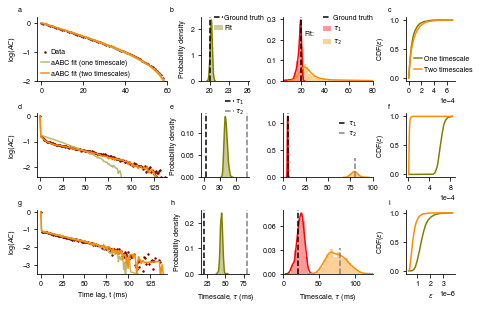

In [6]:
timeLag_label = r'Time lag, t (ms)'
log_ac_label = r'log$(AC)$'
ac_label = r'$AC$'
prob_label = r'Probability density'
abc_fit_label_ac_1tau = r'aABC fit (one timescale)'
abc_fit_label_ac_2tau = r'aABC fit (two timescales)'
abc_fit_label_tau = r'Fit'
# abc_fit_label_tau1 = r'fit: $\tau_1$'
# abc_fit_label_tau2 = r'fit: $\tau_2$'
abc_fit_label_tau1 = r'$\tau_1$'
abc_fit_label_tau2 = r'$\tau_2$'
data_label_1tau = r'Data'
data_label_2tau = r'Data (two-timescales)'
gt_label_tau = r'Ground truth'
# gt_label_tau1 = r'Ground truth: $\tau_1$'
# gt_label_tau2 = r'Ground truth: $\tau_2$'

gt_label_1tau_tau = r'$\tau$'
gt_label_2tau_tau1 = r'$\tau_1$'
gt_label_2tau_tau2 = r'$\tau_2$'
abc_fit_label_1tau_tau = r'$\tau$'
abc_fit_label_2tau_tau1 = r'$\tau_1$'
abc_fit_label_2tau_tau2 = r'$\tau_2$'


gt_label_tau1_err = r'One timescale'
gt_label_tau2_err = r'Two timescales'

time_label = r'Timescale, $\tau$ (ms)'
err_label = r'$\varepsilon$'
cdf_label = r'CDF($\varepsilon$)'

cABC = 'darkorange'
cABC1tau = 'Olive'
cCDF1tau = 'Olive'
cMAP1tau = 'DarkKhaki'
# cCDF1tau = 'Olive'
# cABC1tau = 'Olive'
cABC2 = 'r'
cABC3 = 'gold'
# cAC = plt.cm.Reds(250)
cAC = 'maroon'
cAC2 = 'maroon' #plt.cm.Reds(170)
cMAP = 'orange'
cAccR = 'deepskyblue'
cErr = 'r'
# cAccept = 'darkGreen'
cAccept = 'k'
ctheor = 'k'
ctheor2 = 'gray'


ss = 2
a = 0.4 #transparency
lw = 1.5
lw2 = 1.5
lw3 = 1.5


hspace1 = 0.2 # space between handle and labels
labspec = 0.05 # space between handles
hl = 1.2 # handle length



# fig = plt.figure(figsize=(58,32))
cm = 1/2.54  # centimeters in inches
fig = plt.figure(figsize=(19*cm, 12*cm))
fig.subplots_adjust(hspace=2.1, wspace=4.8)


ft = 7
fleg = 7
fleg0 = 7
fs = 7
feps = 7
flegT = 7

x_text1 = -0.15
y_text1 = 1.08

x_text2 = -0.65
y_text2 = y_text1

x_text3 = -0.38
y_text3 = y_text1

x = 6
y = 11

############### 1on one timescale OU ########################################################
#________________________________________________________
ax = plt.subplot2grid((x,y), (0, 0), colspan=4,rowspan=2)
ax.text(x_text1,y_text1,'a',color='k',fontsize=ft,weight='bold', transform=ax.transAxes)

ac = ac_examp_singOU
binLags = np.arange(0, len(ac), binSize)
plt.scatter(binLags[ac>0],np.log10(ac[ac>0]),color = cAC ,label=data_label_1tau, s = ss, zorder = 0)

ac = ac_map_singOU_2
timescales = map_params_singOU_2[0:2]
binLags = np.arange(0, len(ac), binSize)
plt.plot(binLags[ac>0],np.log10(ac[ac>0]),'-',color = cABC ,\
         label=abc_fit_label_ac_2tau, linewidth = lw, zorder = 2)


ac = ac_map_singOU_1
binLags = np.arange(0, len(ac), binSize)
plt.plot(binLags[ac>0],np.log10(ac[ac>0]),'-',color = cMAP1tau ,label=abc_fit_label_ac_1tau,\
        linewidth = lw, zorder = 1)



handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],frameon = False, fontsize = fleg, loc = 'lower left',\
         bbox_to_anchor=(-0.02, -0.05), handletextpad= hspace1, handlelength = hl)


# plt.xlabel(timeLag_label)
plt.ylabel(log_ac_label)
plt.ylim([-2.,0.2])
plt.xlim([-2,60])


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#________________________________________________________
ax = plt.subplot2grid((x,y), (0, 4), colspan=2,rowspan=2)
ax.text(x_text2,y_text2,'b',color='k',fontsize=ft,weight='bold', transform=ax.transAxes)

abc = abc_singOU_1
step = step_singOU_1
tau1 = abc[step - 1][0][0]
ax.hist(tau1, bins = np.arange(19,26,0.15), facecolor= cABC1tau, density=True, alpha = a,\
        label = abc_fit_label_tau)
sns.kdeplot(tau1, data2=None, shade=False, vertical=False, color = cABC1tau)
plt.axvline(20, color = ctheor, linewidth = lw3, linestyle = '--', label = gt_label_tau)

plt.ylabel(prob_label, color = cAccept)

# ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))
plt.xticks([20,23,26])

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['left'].set_color(cAccept)
ax.tick_params(axis='y', colors=cAccept)
ax.spines['bottom'].set_color(cAccept)
ax.tick_params(axis='x', colors=cAccept)

# handles_1tau, labels_1tau = ax.get_legend_handles_labels()
ax.legend(frameon = False, fontsize = fleg, bbox_to_anchor=(1.43, 1.14), loc = 'upper right', handletextpad= hspace1,\
         handlelength = hl)

#________________________________________________________
ax = plt.subplot2grid((x,y), (0,6), colspan=3,rowspan=2)

abc = abc_singOU_2
step = step_singOU_2

tau1 = abc[step - 1][0][0]+0
tau2 = abc[step - 1][0][1]+0
swap_id = np.where(tau1 > tau2)[0]
if swap_id.size:
    tau1_temp = tau1 + 0
    tau2_temp = tau2 + 0
    tau1_temp[swap_id] = tau2[swap_id]
    tau2_temp[swap_id] = tau1[swap_id]
tau1 = tau1_temp
tau2 = tau2_temp


ax.hist(tau1, bins = np.arange(0,85,2), facecolor= cABC2, density=True, alpha = a, label = abc_fit_label_tau1)
ax.hist(tau2, bins = np.arange(0,85,2), facecolor= cABC, density=True, alpha = a, label = abc_fit_label_tau2)
sns.kdeplot(tau1, data2=None, shade=False, vertical=False, color = cABC2)
sns.kdeplot(tau2, data2=None, shade=False, vertical=False, color = cABC)
plt.axvline(20, color = ctheor, label = gt_label_tau, linewidth = lw3, linestyle = '--')

# plt.xlabel(r'$\tau$ [ms]')
plt.ylabel('')
plt.xlim([5,80])


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, frameon = False, fontsize = flegT, bbox_to_anchor=(1.07, 1.14), loc='upper right',\
          handletextpad= hspace1, handlelength = hl)
ax.text(0.23,0.7,'Fit:',color='k',fontsize=flegT, transform=ax.transAxes)
#________________________________________________________
ax = plt.subplot2grid((x,y), (0,9), colspan=2,rowspan=2)
ax.text(x_text3,y_text3,'c',color='k',fontsize=ft,weight='bold', transform=ax.transAxes)

plt.plot(eval_points_singOU, cdf_1tau_singOU, color = cCDF1tau, linewidth = lw2, label = gt_label_tau1_err)
plt.plot(eval_points_singOU, cdf_2tau_singOU, color = cABC, linestyle = '-', linewidth = lw2,\
         label = gt_label_tau2_err)

ax.xaxis.set_major_locator(plt.MaxNLocator(4))
# plt.xlabel(r'$\epsilon$', fontsize = feps)
plt.ylabel(cdf_label)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

leg = ax.legend(frameon = False, fontsize = fleg, bbox_to_anchor=(0.02, 0.02), loc='lower left',\
                handletextpad= hspace1, handlelength = hl)


############### db OU ########################################################
#________________________________________________________
ax = plt.subplot2grid((x,y), (2, 0), colspan=4,rowspan=2)
ax.text(x_text1,y_text1,'d',color='k',fontsize=ft,weight='bold', transform=ax.transAxes)

ac = ac_examp_dbOU_simp
ac = ac/ac[0]
binLags = np.arange(0, len(ac), binSize)
plt.scatter(binLags[ac>0],np.log10(ac[ac>0]),color = cAC2 \
            ,label=data_label_2tau, s = ss)

ac = ac_map_dbOU_simp_1
ac = ac/ac[0]
binLags = np.arange(0, len(ac), binSize)
plt.plot(binLags[ac>0],np.log10(ac[ac>0]),'-',color = cMAP1tau ,label=abc_fit_label_ac_1tau,\
        linewidth = lw)

ac = ac_map_dbOU_simp_2
ac = ac/ac[0]
timescales = map_params_dbOU_simp_2[0:2]
binLags = np.arange(0, len(ac), binSize)
plt.plot(binLags[ac>0],np.log10(ac[ac>0]),'-',color = cABC ,\
         label=abc_fit_label_ac_2tau, linewidth = lw)

handles, labels = ax.get_legend_handles_labels()
handles_top, labels_top = [handles[2]], [labels[2]]


# plt.xlabel(timeLag_label)
plt.ylabel(log_ac_label)
plt.ylim([-2.4,0.1])
plt.xlim([-3,140])
# plt.title('two-timescales data', y = 0.85, color = cAC2)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#________________________________________________________
ax = plt.subplot2grid((x,y), (2, 4), colspan=2,rowspan=2)
ax.text(x_text2,y_text2,'e',color='k',fontsize=ft,weight='bold', transform=ax.transAxes)

abc = abc_dbOU_simp_1
step = step_dbOU_simp_1
tau1 = abc[step - 1][0][0]
ax.hist(tau1, bins = np.arange(0,70,2.5), facecolor= cABC1tau, density=True, alpha = a, label= abc_fit_label_1tau_tau)
sns.kdeplot(tau1, data2=None, shade=False, vertical=False, color = cABC1tau)
plt.axvline(5, color = ctheor, linewidth = lw3, linestyle = '--', label = gt_label_2tau_tau1)
plt.axvline(80, color = ctheor2, linewidth = lw3, linestyle = '--', label = gt_label_2tau_tau2)

# plt.xlabel(r'$\tau$ [ms]')
plt.ylabel(prob_label)
ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.xaxis.set_major_locator(plt.MaxNLocator(3))


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:2], labels[0:2], frameon = False, fontsize = flegT, bbox_to_anchor=(1.02, 1.35), loc='upper right',\
          handletextpad= hspace1, labelspacing=labspec, handlelength = hl)
#________________________________________________________
ax = plt.subplot2grid((x,y), (2, 6), colspan=3,rowspan=2)


abc = abc_dbOU_simp_2
step = step_dbOU_simp_2
tau1 = abc[step - 1][0][0]
tau2 = abc[step - 1][0][1]

ax.hist(tau1, bins = np.arange(0,50,2), facecolor= cABC2, density=True, alpha = a)
ax.hist(tau2, bins = np.arange(0,100,2), facecolor= cABC, density=True, alpha = a)
sns.kdeplot(tau1, data2=None, shade=False, vertical=False, color = cABC2)
sns.kdeplot(tau2, data2=None, shade=False, vertical=False, color = cABC)
plt.axvline(5, color = ctheor, label = gt_label_2tau_tau1, linewidth = lw3, linestyle = '--')
plt.axvline(80, ymin = 0, ymax = 0.3, color = ctheor2, label = gt_label_2tau_tau2, linewidth = lw3, linestyle = '--')


plt.xlim([0,100])
plt.ylabel('')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['left'].set_color(cAccept)
ax.tick_params(axis='y', colors=cAccept)
ax.spines['bottom'].set_color(cAccept)
ax.tick_params(axis='x', colors=cAccept)

ax.legend(handles[0:2], labels[0:2], frameon = False, fontsize = flegT, bbox_to_anchor=(0.9, 1.), \
          loc='upper right',handletextpad= hspace1, labelspacing=labspec, handlelength = hl)

#________________________________________________________
ax = plt.subplot2grid((x,y), (2,9), colspan=2,rowspan=2)
ax.text(x_text3,y_text3,'f',color='k',fontsize=ft,weight='bold', transform=ax.transAxes)

plt.plot(eval_points_dbOU_simp, cdf_1tau_dbOU_simp, color = cCDF1tau, linewidth = lw2,\
         label = 'one-timescale')
plt.plot(eval_points_dbOU_simp, cdf_2tau_dbOU_simp, color = cABC, linestyle = '-', linewidth = lw2,\
         label = 'two-timescales')

ax.xaxis.set_major_locator(plt.MaxNLocator(3))
# plt.xlabel(r'$\epsilon$', fontsize = feps)
plt.ylabel(cdf_label)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


############### db OU amb ########################################################
#________________________________________________________
ax = plt.subplot2grid((x,y), (4, 0), colspan=4,rowspan=2)
ax.text(x_text1,y_text1,'g',color='k',fontsize=ft,weight='bold', transform=ax.transAxes)

ac = ac_examp_dbOU
ac = ac/ac[0]
binLags = np.arange(0, len(ac), binSize)
plt.scatter(binLags[ac>0],np.log10(ac[ac>0]),color = cAC2 \
            ,label=data_label_2tau, s = ss)

ac = ac_map_dbOU_1
ac = ac/ac[0]
binLags = np.arange(0, len(ac), binSize)
plt.plot(binLags[ac>0],np.log10(ac[ac>0]),'-',color = cMAP1tau ,label=abc_fit_label_ac_1tau,\
        linewidth = lw)

ac = ac_map_dbOU_2
ac = ac/ac[0]
timescales = map_params_dbOU_2[0:2]
binLags = np.arange(0, len(ac), binSize)
plt.plot(binLags[ac>0],np.log10(ac[ac>0]),'-',color = cABC ,\
         label=abc_fit_label_ac_2tau, linewidth = lw)


handles, labels = ax.get_legend_handles_labels()
handles_top, labels_top = [handles[2]], [labels[2]]


plt.xlabel(timeLag_label)
plt.ylabel(log_ac_label)
plt.ylim([-3.5,0.1])
plt.xlim([-4,145])
# plt.title('two-timescales data', y = 0.85, color = cAC2)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#________________________________________________________
ax = plt.subplot2grid((x,y), (4, 4), colspan=2,rowspan=2)
ax.text(x_text2,y_text2,'h',color='k',fontsize=ft,weight='bold', transform=ax.transAxes)

abc = abc_dbOU_1
step = step_dbOU_1
tau1 = abc[step - 1][0][0]
ax.hist(tau1, bins = np.arange(40,60,1), facecolor= cABC1tau, density=True, alpha = a,\
        label = abc_fit_label_tau)
sns.kdeplot(tau1, data2=None, shade=False, vertical=False, color = cABC1tau)
plt.axvline(20, color = ctheor, linewidth = lw3, linestyle = '--')
plt.axvline(80, color = ctheor2, linewidth = lw3, linestyle = '--')

ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))

plt.xlabel(time_label)
plt.ylabel(prob_label)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.legend(frameon = False, fontsize = fleg)
handles_1tau, labels_1tau = ax.get_legend_handles_labels()
#________________________________________________________
ax = plt.subplot2grid((x,y), (4, 6), colspan=3,rowspan=2)


abc = abc_dbOU_2
step = step_dbOU_2
tau1 = abc[step - 1][0][0]
tau2 = abc[step - 1][0][1]
ax.hist(tau1, bins = np.arange(0,50,5), facecolor= cABC2, density=True, alpha = a,\
        label = abc_fit_label_tau1)
ax.hist(tau2, bins = np.arange(0,140,5), facecolor= cABC, density=True, alpha = a,\
        label = abc_fit_label_tau2)
sns.kdeplot(tau1, data2=None, shade=False, vertical=False, color = cABC2)
sns.kdeplot(tau2, data2=None, shade=False, vertical=False, color = cABC)
plt.axvline(20, color = ctheor, label = gt_label_2tau_tau1, linewidth = lw3, linestyle = '--')
plt.axvline(80, ymin = 0, ymax = 0.4, color = ctheor2, label = gt_label_2tau_tau2, linewidth = lw3, linestyle = '--')

plt.xlabel(time_label, color = cAccept)
# plt.ylabel(prob_label, color = cAccept)

plt.xlim([0,125])
plt.ylabel('')
ax.yaxis.set_major_locator(plt.MaxNLocator(3))

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['left'].set_color(cAccept)
ax.tick_params(axis='y', colors=cAccept)
ax.spines['bottom'].set_color(cAccept)
ax.tick_params(axis='x', colors=cAccept)

#________________________________________________________
ax = plt.subplot2grid((x,y), (4,9), colspan=2,rowspan=2)
ax.text(x_text3,y_text3,'i',color='k',fontsize=ft,weight='bold', transform=ax.transAxes)

plt.plot(eval_points_dbOU, cdf_1tau_dbOU, color = cCDF1tau, linewidth = lw2, label = 'one-timescale')
plt.plot(eval_points_dbOU, cdf_2tau_dbOU, color = cABC, linestyle = '-', linewidth = lw2, label = 'two-timescales')

ax.xaxis.set_major_locator(plt.MaxNLocator(4))
plt.xlabel(err_label, fontsize = feps)
plt.ylabel(cdf_label)

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# plt.savefig(save_fig_path+'fig5.pdf',bbox_inches='tight')